In [54]:
import numpy as np
import matplotlib.pyplot as plt
import mne

In [55]:
subs = ['13', '16', '17', '18', '21', '23', '26', '28', '29', '30', '31', '32', '33',
        '34', '35', '36', '38', '39', '40', '41', '42']
tmin, tmax = -0.1, 0.6

smooths = '_data=' + str(tmin) + '_' + str(tmax)


figures_MainFolder = "..\Figures\\"
figuresFolder = figures_MainFolder 
print('Figures folder: ', figuresFolder)
 
classResuts_folder =  "..\Results\Data=" + str(tmin) + '_' + str(tmax) + '\\'
print('Data will be loaded from folder ', classResuts_folder)

meg_MainFolder = "..\Data\MEG_Data\Data="
dataFolder = meg_MainFolder + str(tmin) + '_' + str(tmax) + '\\'
print('Data folder: ', dataFolder)

Figures folder:  ..\Figures\
Data will be loaded from folder  ..\Results\Data=-0.1_0.6\
Data folder:  ..\Data\MEG_Data\Data=-0.1_0.6\


In [56]:
filename_ext = ''
if tmin == -0.8 and tmax == 0.6:
    filename_ext = '-elongated'
elif tmin == -0.8 and tmax == 1:
    filename_ext = '-elongated_2'
    
print('filename ext: ', filename_ext)

filename ext:  


In [57]:
# load epoch data
s_id = '17'

fname = dataFolder + 'S' + s_id + '/' + s_id + '_2_tsss_mc_trans_mag_nobase-epochs_afterICA'+filename_ext+'_manually_AR_resampled.fif' 

epoch =  mne.read_epochs(fname, verbose='error')
print('Times: ', epoch.times)

Times:  [-0.1  -0.09 -0.08 -0.07 -0.06 -0.05 -0.04 -0.03 -0.02 -0.01  0.    0.01
  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12  0.13
  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23  0.24  0.25
  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35  0.36  0.37
  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47  0.48  0.49
  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59]


### 3 levels in high conf

In [58]:
# High
ch8 = np.load(classResuts_folder + 'omi_high_8'+ smooths +'.npy')
ch9 = np.load(classResuts_folder + 'omi_high_9'+ smooths +'.npy')
ch10 = np.load(classResuts_folder + 'omi_high_10'+ smooths +'.npy')

# Low
cl8 = np.load(classResuts_folder + 'omi_low_8'+ smooths +'.npy')
cl9 = np.load(classResuts_folder + 'omi_low_9'+ smooths +'.npy')
cl10 = np.load(classResuts_folder + 'omi_low_10'+ smooths +'.npy')

# Exclude participants with noisy data:
p2exc_h = 18

# Zero data:
zeros_l8 = np.where(np.sum(cl8, axis = 1) == 0)[0].tolist()
zeros_l9 = np.where(np.sum(cl9, axis = 1) == 0)[0].tolist()
zeros_l10 = np.where(np.sum(cl10, axis = 1) == 0)[0].tolist()

p2exc_l = list(set(zeros_l8 + zeros_l9))
#p2exc_l.append(p2exc_h)

p2exc_l.sort()
print('Exclusion list for low: ', p2exc_l)

ch8 = np.delete(ch8, (p2exc_l), axis=0)
ch9 = np.delete(ch9, (p2exc_l), axis=0)
ch10 = np.delete(ch10, (p2exc_l), axis=0)

# ALL
c8 = np.load(classResuts_folder + 'omi_8'+ smooths +'.npy')
c9 = np.load(classResuts_folder + 'omi_9'+ smooths +'.npy')
c10 = np.load(classResuts_folder + 'omi_10'+ smooths +'.npy')

# Exclude participants with noisy data:


cl8 = np.delete(cl8, (p2exc_l), axis=0)
cl9 = np.delete(cl9, (p2exc_l), axis=0)
cl10 = np.delete(cl10, (p2exc_l), axis=0)


chc = np.load(classResuts_folder + 'omi_corr_high'+ smooths +'.npy')
chi = np.load(classResuts_folder + 'omi_incorr_high'+ smooths +'.npy')
zeros_hi = np.where(np.sum(chi, axis = 1) == 0)[0].tolist()
print('Zeros high incorr: ', zeros_hi)
chc = np.delete(chc, (zeros_hi), axis=0)
chi = np.delete(chi, (zeros_hi), axis=0)


Exclusion list for low:  [5, 19]
Zeros high incorr:  [8, 18]


In [59]:
# Smooth

# HIGH
sm_n = 10# Smoothing for the data 
ch8s = np.zeros((ch8.shape[0], ch8.shape[1] - sm_n + 1))
ch9s = np.zeros((ch9.shape[0], ch9.shape[1] - sm_n + 1))
ch10s = np.zeros((ch10.shape[0], ch10.shape[1] - sm_n + 1))
times_sm = epoch.times[:-sm_n+1]

for s in np.arange(ch8.shape[0]):
    ch8s[s] = np.convolve(ch8[s], np.ones((sm_n,))/sm_n, mode='valid')
    ch9s[s] = np.convolve(ch9[s], np.ones((sm_n,))/sm_n, mode='valid')
    ch10s[s] = np.convolve(ch10[s], np.ones((sm_n,))/sm_n, mode='valid')

print('ch8s: ', ch8s.shape)
print('ch9s: ', ch9s.shape)
print('ch10s: ', ch10s.shape)

# LOW
cl8s = np.zeros((cl8.shape[0], cl8.shape[1] - sm_n + 1))
cl9s = np.zeros((cl9.shape[0], cl9.shape[1] - sm_n + 1))
cl10s = np.zeros((cl10.shape[0], cl10.shape[1] - sm_n + 1))

for s in np.arange(cl8.shape[0]):
    cl8s[s] = np.convolve(cl8[s], np.ones((sm_n,))/sm_n, mode='valid')
    cl9s[s] = np.convolve(cl9[s], np.ones((sm_n,))/sm_n, mode='valid')
    cl10s[s] = np.convolve(cl10[s], np.ones((sm_n,))/sm_n, mode='valid')

print('cl8s: ', cl8s.shape)
print('cl9s: ', cl9s.shape)
print('cl10s: ', cl10s.shape)

# ALL
c8s = np.zeros((c8.shape[0], ch8.shape[1] - sm_n + 1))
c9s = np.zeros((c9.shape[0], ch9.shape[1] - sm_n + 1))
c10s = np.zeros((c10.shape[0], ch10.shape[1] - sm_n + 1))

for s in np.arange(c8.shape[0]):
    c8s[s] = np.convolve(c8[s], np.ones((sm_n,))/sm_n, mode='valid')
    c9s[s] = np.convolve(c9[s], np.ones((sm_n,))/sm_n, mode='valid')
    c10s[s] = np.convolve(c10[s], np.ones((sm_n,))/sm_n, mode='valid')

print('c8s: ', c8s.shape)
print('c9s: ', c9s.shape)
print('c10s: ', c10s.shape)


# Correct Incorrect
chcs = np.zeros((chc.shape[0], ch8.shape[1] - sm_n + 1))
chis = np.zeros((chi.shape[0], ch9.shape[1] - sm_n + 1))
for s in np.arange(chc.shape[0]):
    chcs[s] = np.convolve(chc[s], np.ones((sm_n,))/sm_n, mode='valid')
    chis[s] = np.convolve(chi[s], np.ones((sm_n,))/sm_n, mode='valid')


for s in np.arange(c8.shape[0]):
    c8s[s] = np.convolve(c8[s], np.ones((sm_n,))/sm_n, mode='valid')
    c9s[s] = np.convolve(c9[s], np.ones((sm_n,))/sm_n, mode='valid')
    c10s[s] = np.convolve(c10[s], np.ones((sm_n,))/sm_n, mode='valid')

print('c8s: ', c8s.shape)
print('c9s: ', c9s.shape)
print('c10s: ', c10s.shape)

ch8s:  (19, 61)
ch9s:  (19, 61)
ch10s:  (19, 61)
cl8s:  (19, 61)
cl9s:  (19, 61)
cl10s:  (19, 61)
c8s:  (21, 61)
c9s:  (21, 61)
c10s:  (21, 61)
c8s:  (21, 61)
c9s:  (21, 61)
c10s:  (21, 61)


In [60]:
np.max(np.mean(ch8s, axis=0))

0.5283874570375108

In [61]:
from scipy.stats import wilcoxon, kruskal

n_sub = len(ch8s)
p_thres = 0.05
chance = 0.5
nt = ch8s.shape[1]

p8h = np.ones(nt)
p9h = np.ones(nt)
p10h = np.ones(nt)

p8l = np.ones(nt)
p9l = np.ones(nt)
p10l = np.ones(nt)

p8 = np.ones(nt)
p9 = np.ones(nt)
p10 = np.ones(nt)

p8hl = np.ones(nt)
p9hl = np.ones(nt)

pchc = np.ones(nt)
pchi = np.ones(nt)

# No 10 because of very few trials and zeros for 10 + Low
for t in np.arange(nt):
        
    x, p8h[t] = wilcoxon(ch8s[:,t]-chance, alternative='greater')
    x, p9h[t] = wilcoxon(ch9s[:,t]-chance, alternative='greater')
    x, p10h[t] = wilcoxon(ch10s[:,t]-chance, alternative='greater')
    
    x, p8[t] = wilcoxon(c8s[:,t]-chance, alternative='greater')
    x, p9[t] = wilcoxon(c9s[:,t]-chance, alternative='greater')
    x, p10[t] = wilcoxon(c10s[:,t]-chance, alternative='greater')
    
    x, p8l[t] = wilcoxon(cl8s[:,t]-chance, alternative='greater')
    x, p9l[t] = wilcoxon(cl9s[:,t]-chance, alternative='greater')
    x, p10l[t] = wilcoxon(cl10s[:,t]-chance, alternative='greater')
    
    x, pchc[t] = wilcoxon(chcs[:,t]-chance, alternative='greater')
    x, pchi[t] = wilcoxon((1-chis[:,t])-chance, alternative='greater')
    
    x, p8hl[t] = wilcoxon(ch8s[:,t], cl8s[:,t],alternative='greater')
    x, p9hl[t] = wilcoxon(ch9s[:,t], cl9s[:,t],alternative='greater')
    
print('HIGH')
print('Time points where 80% is above chance: ', times_sm[np.where(p8h <= p_thres)[0]])
print('Time points where 90% is above chance: ', times_sm[np.where(p9h <= p_thres)[0]])
print('Time points where 100% is above chance: ', times_sm[np.where(p10h <= p_thres)[0]])

print('LOW')
print('Time points where 80% is above chance: ', times_sm[np.where(p8l <= p_thres)[0]])
print('Time points where 90% is above chance: ', times_sm[np.where(p9l <= p_thres)[0]])
print('Time points where 100% is above chance: ', times_sm[np.where(p10l <= p_thres)[0]])

print('ALL')
print('Time points where 80% is above chance: ', times_sm[np.where(p8 <= p_thres)[0]])
print('Time points where 90% is above chance: ', times_sm[np.where(p9 <= p_thres)[0]])
print('Time points where 100% is above chance: ', times_sm[np.where(p10 <= p_thres)[0]])

print('HIGH vs LOW')
print('Time points where 80% differs for high vs low: ', times_sm[np.where(p8hl <= p_thres)[0]])
print('Time points where 90% differs for high vs low: ', times_sm[np.where(p9hl <= p_thres)[0]])

x,p8hl_corr = mne.stats.fdr_correction(p8hl, alpha = p_thres, method='negcorr')
print('Time points where 80% differs for high vs low CORRECTED: ', times_sm[np.where(p8hl_corr <= p_thres)[0]])

print('High correct')
print('Time points where high and correct above chance: ', times_sm[np.where(pchc <= p_thres)[0]])

print('High incorrect')
print('Time points where high and incorrect: ', times_sm[np.where(pchi <= p_thres)[0]])

HIGH
Time points where 80% is above chance:  [0.14 0.15 0.16 0.17 0.18 0.19 0.2 ]
Time points where 90% is above chance:  [0.13 0.14 0.15 0.16]
Time points where 100% is above chance:  [0.4]
LOW
Time points where 80% is above chance:  [0.46 0.47 0.48 0.49 0.5 ]
Time points where 90% is above chance:  []
Time points where 100% is above chance:  []
ALL
Time points where 80% is above chance:  [0.45 0.46 0.47 0.48 0.49 0.5 ]
Time points where 90% is above chance:  []
Time points where 100% is above chance:  [0.13 0.15 0.16 0.39 0.4  0.41]
HIGH vs LOW
Time points where 80% differs for high vs low:  [0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.3  0.31 0.32]
Time points where 90% differs for high vs low:  [0.11 0.12 0.15]
Time points where 80% differs for high vs low CORRECTED:  []
High correct
Time points where high and correct above chance:  [0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21]
High incorrect
Time points where high and incorrect:  [0.24 0.25 0.26 0.27]


C:\Users\CCN_PG\miniconda3\envs\exp\lib\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


timepoints p8h:  [0.14 0.15 0.16 0.17 0.18 0.19 0.2 ]
timepoints p9h:  [0.13 0.14 0.15 0.16]
timepoints p10h:  [0.4]


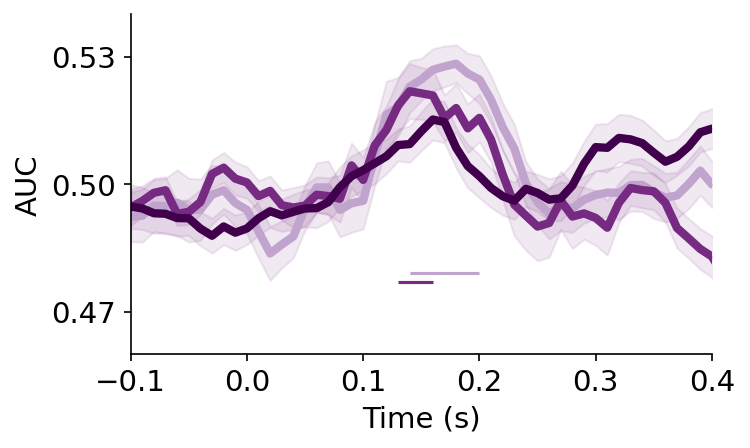

In [62]:
from scipy.stats import sem

font_size = 14
al = 0.1 # alpha transparency
times_sm = epoch.times[:-sm_n+1]

# initialize plots:
fig, ax2 = plt.subplots(nrows=1, sharex=True, figsize=(5,3), dpi=150)
chance_col = np.array([37,37,37])/256

ColorsList = np.array(([194,165,207], [118,42,131], [64,0,75]))/256

col = np.array([118,42,131])/256

#80% high
mean_ch8s = np.mean(ch8s, axis = 0)
ch8se = sem(ch8s, axis = 0)/2

ax2.plot(times_sm, mean_ch8s, color = ColorsList[0], linewidth = 4)
ax2.fill_between(times_sm, mean_ch8s, mean_ch8s + ch8se, color = col, interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_ch8s, mean_ch8s - ch8se, color = col, interpolate=True, alpha = al)


print('timepoints p8h: ', times_sm[np.where(p8h <= p_thres)[0]])

if len(np.where(p8h <= 0.05)[0]) > 0:
    ax2.hlines(y=0.479, xmin=times_sm[np.where(p8h <= p_thres)[0][0]], 
               xmax=times_sm[np.where(p8h <= 0.05)[0][-1]], color=ColorsList[0], linestyle='-')



#90% high
mean_ch9s = np.mean(ch9s, axis = 0)
ch9se = sem(ch9s, axis = 0)/2
ax2.plot(times_sm, mean_ch9s, color = ColorsList[1], linewidth = 4)
ax2.fill_between(times_sm, mean_ch9s, mean_ch9s + ch9se, color = col, interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_ch9s, mean_ch9s - ch9se, color = col, interpolate=True, alpha = al)


print('timepoints p9h: ', times_sm[np.where(p9h <= p_thres)[0]])
if len(np.where(p9h <= 0.05)[0]) > 0:
    ax2.hlines(y=0.477, xmin=times_sm[np.where(p9h <= p_thres)[0][0]], 
               xmax=times_sm[np.where(p9h <= 0.05)[0][-1]], color=ColorsList[1], linestyle='-')



#100% high 
mean_ch10s = np.mean(ch10s, axis = 0)
ch10se = sem(ch10s, axis = 0)/2
ax2.plot(times_sm, mean_ch10s, color = ColorsList[2], linewidth = 4)
ax2.fill_between(times_sm, mean_ch10s, mean_ch10s + ch10se, color = col, interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_ch10s, mean_ch10s - ch10se, color = col, interpolate=True, alpha = al)


print('timepoints p10h: ', times_sm[np.where(p10h <= p_thres)[0]])
if len(np.where(p10h <= 0.05)[0]) > 0:
    ax2.hlines(y=0.475, xmin=times_sm[np.where(p10h <= p_thres)[0][0]], 
               xmax=times_sm[np.where(p10h <= 0.05)[0][-1]], color=ColorsList[2], linestyle='-')


ax2.set_xticks(np.arange(-0.1, 0.6, 0.1))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.ylim([0.46, 0.54])
plt.yticks([0.47,0.50,0.53], fontsize=font_size)
plt.xticks([-0.1,0,0.1,0.2,0.3,0.4,0.5], fontsize=font_size)
plt.xlim([-0.1, 0.4])

#plt.legend([label8,label9,label10], loc=5, bbox_to_anchor=(1.45, 0.7), handlelength=4)
plt.xlabel('Time (s)', fontsize=font_size)
plt.ylabel('AUC', fontsize=font_size)


# Chance
#ax2.hlines(y=0.5, xmin=times_sm[0], xmax=times_sm[-1], color=chance_col, linestyle='--')

plotname = figuresFolder + 'MVPA_High_3Pred' + smooths+'.png'
plt.savefig(plotname, bbox_inches='tight')
plt.show()




timepoints p10:  [0.13 0.15 0.16 0.39 0.4  0.41]


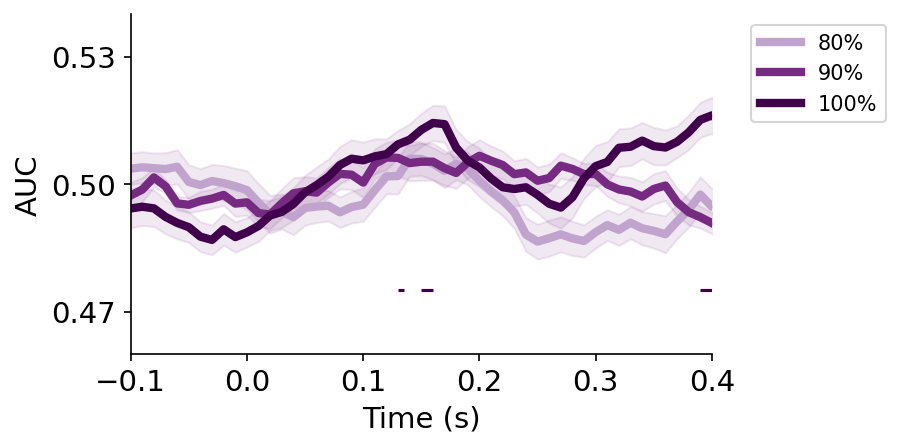

In [63]:
from scipy.stats import sem

font_size = 14
al = 0.1 # alpha transparency
times_sm = epoch.times[:-sm_n+1]

# initialize plots:
fig, ax2 = plt.subplots(nrows=1, sharex=True, figsize=(5,3), dpi=150)
chance_col = np.array([37,37,37])/256


ColorsList = np.array(([194,165,207], [118,42,131], [64,0,75]))/256

col = np.array([118,42,131])/256

#80% 
mean_c8s = np.mean(c8s, axis = 0)
c8se = sem(c8s, axis = 0)/2

ax2.plot(times_sm, mean_c8s, color = ColorsList[0], linewidth = 4, label='80%')
ax2.fill_between(times_sm, mean_c8s, mean_c8s + c8se, color = col, interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_c8s, mean_c8s - c8se, color = col, interpolate=True, alpha = al)

#90% 
mean_c9s = np.mean(c9s, axis = 0)
c9se = sem(c9s, axis = 0)/2
ax2.plot(times_sm, mean_c9s, color = ColorsList[1], linewidth = 4, label='90%')
ax2.fill_between(times_sm, mean_c9s, mean_c9s + c9se, color = col, interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_c9s, mean_c9s - c9se, color = col, interpolate=True, alpha = al)

#100%  
mean_c10s = np.mean(c10s, axis = 0)
c10se = sem(c10s, axis = 0)/2
ax2.plot(times_sm, mean_c10s, color = ColorsList[2], linewidth = 4, label='100%')
ax2.fill_between(times_sm, mean_c10s, mean_c10s + c10se, color = col, interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_c10s, mean_c10s - c10se, color = col, interpolate=True, alpha = al)


print('timepoints p10: ', times_sm[np.where(p10 <= p_thres)[0]])
if len(np.where(p10 <= 0.05)[0]) > 0:
    ax2.hlines(y=0.475, xmin=times_sm[np.where(p10 <= p_thres)[0][0]], 
               xmax=times_sm[np.where(p10 <= 0.05)[0][0]]+0.005, color=ColorsList[2], linestyle='-')
    
    ax2.hlines(y=0.475, xmin=times_sm[np.where(p10 <= p_thres)[0][1]], 
           xmax=times_sm[np.where(p10 <= 0.05)[0][2]], color=ColorsList[2], linestyle='-')
   
    ax2.hlines(y=0.475, xmin=times_sm[np.where(p10 <= p_thres)[0][3]], 
           xmax=times_sm[np.where(p10 <= 0.05)[0][-1]], color=ColorsList[2], linestyle='-')



ax2.set_xticks(np.arange(-0.1, 0.6, 0.1))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.ylim([0.46, 0.54])
plt.yticks([0.47,0.50,0.53], fontsize=font_size)
plt.xticks([-0.1,0,0.1,0.2,0.3,0.4,0.5], fontsize=font_size)

#plt.legend([label8,label9,label10], loc=5, bbox_to_anchor=(1.45, 0.7), handlelength=4)
plt.xlabel('Time (s)', fontsize=font_size)
plt.ylabel('AUC', fontsize=font_size)


# Chance
#ax2.hlines(y=0.5, xmin=times_sm[0], xmax=times_sm[-1], color=chance_col, linestyle='--')
plt.xlim([-0.1, 0.4])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plotname = figuresFolder + 'MVPA_ALL_3Pred' + smooths+'.png'
plt.savefig(plotname, bbox_inches='tight')
plt.show()




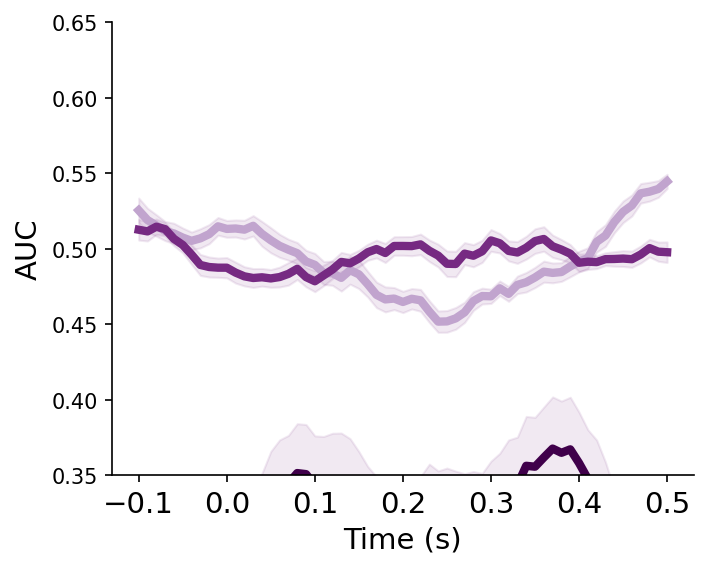

In [64]:
font_size = 14
al = 0.1 # alpha transparency
times_sm = epoch.times[:-sm_n+1]

# initialize plots:
fig, ax2 = plt.subplots(nrows=1, sharex=True, figsize=(5,4), dpi=150)
chance_col = np.array([37,37,37])/256


ColorsList = np.array(([194,165,207], [118,42,131], [64,0,75]))/256

col = np.array([118,42,131])/256

#80% high
mean_ch8s = np.mean(cl8s, axis = 0)
ch8se = sem(cl8s, axis = 0)/2

ax2.plot(times_sm, mean_ch8s, color = ColorsList[0], linewidth = 4)
ax2.fill_between(times_sm, mean_ch8s, mean_ch8s + ch8se, color = col, interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_ch8s, mean_ch8s - ch8se, color = col, interpolate=True, alpha = al)

#90% high
mean_ch9s = np.mean(cl9s, axis = 0)
ch9se = sem(cl9s, axis = 0)/2
ax2.plot(times_sm, mean_ch9s, color = ColorsList[1], linewidth = 4)
ax2.fill_between(times_sm, mean_ch9s, mean_ch9s + ch9se, color = col, interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_ch9s, mean_ch9s - ch9se, color = col, interpolate=True, alpha = al)

#100% high 
mean_ch10s = np.mean(cl10s, axis = 0)
ch10se = sem(cl10s, axis = 0)/2
ax2.plot(times_sm, mean_ch10s, color = ColorsList[2], linewidth = 4)
ax2.fill_between(times_sm, mean_ch10s, mean_ch10s + ch10se, color = col, interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_ch10s, mean_ch10s - ch10se, color = col, interpolate=True, alpha = al)


ax2.set_xticks(np.arange(-0.1, 0.6, 0.1))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.ylim([0.35, 0.65])
#plt.yticks([0.47,0.50,0.53], fontsize=font_size)
plt.xticks([-0.1,0,0.1,0.2,0.3,0.4,0.5], fontsize=font_size)

#plt.legend([label8,label9,label10], loc=5, bbox_to_anchor=(1.45, 0.7), handlelength=4)
plt.xlabel('Time (s)', fontsize=font_size)
plt.ylabel('AUC', fontsize=font_size)


# Chance
#ax2.hlines(y=0.5, xmin=times_sm[0], xmax=times_sm[-1], color=chance_col, linestyle='--')

plotname = figuresFolder + 'omissions_conf_pred_all_LOW' + smooths+'.png'
#plt.savefig(plotname, bbox_inches='tight')
plt.show()




timepoints p8h:  [0.14 0.15 0.16 0.17 0.18 0.19 0.2 ]


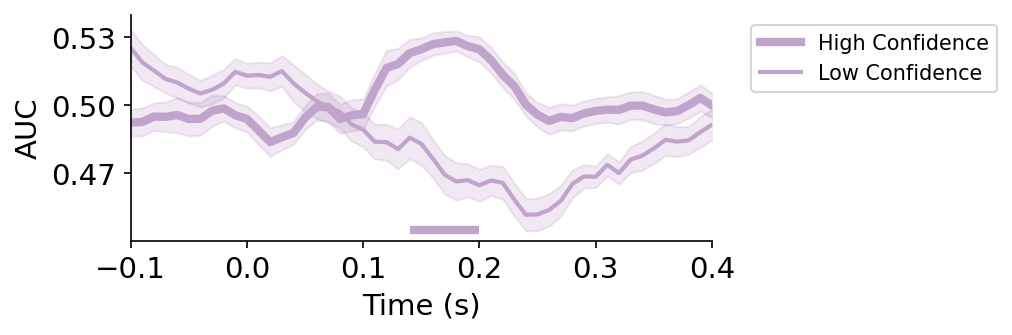

In [65]:
from scipy.stats import sem

font_size = 14
al = 0.1 # alpha transparency
times_sm = epoch.times[:-sm_n+1]

# initialize plots:
fig, ax2 = plt.subplots(nrows=1, sharex=True, figsize=(5,2), dpi=150)
chance_col = np.array([37,37,37])/256

ColorsList = np.array(([194,165,207], [118,42,131], [64,0,75]))/256

col = np.array([118,42,131])/256

#80% high
mean_ch8s = np.mean(ch8s, axis = 0)
ch8se = sem(ch8s, axis = 0)/2

ax2.plot(times_sm, mean_ch8s, color = ColorsList[0], linewidth = 4, label='High Confidence')
ax2.fill_between(times_sm, mean_ch8s, mean_ch8s + ch8se, color = col, interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_ch8s, mean_ch8s - ch8se, color = col, interpolate=True, alpha = al)

print('timepoints p8h: ', times_sm[np.where(p8h <= p_thres)[0]])
if len(np.where(p8h <= 0.05)[0]) > 0:
    ax2.hlines(y=0.445, xmin=times_sm[np.where(p8h <= p_thres)[0][0]], 
               xmax=times_sm[np.where(p8h <= 0.05)[0][-1]], color=ColorsList[0], linestyle='-', linewidth = 4)


#80% low
mean_cl8s = np.mean(cl8s, axis = 0)
cl8se = sem(cl8s, axis = 0)/2

ax2.plot(times_sm, mean_cl8s, color = ColorsList[0], linewidth = 2, label='Low Confidence')
ax2.fill_between(times_sm, mean_cl8s, mean_cl8s + cl8se, color = col, interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_cl8s, mean_cl8s - cl8se, color = col, interpolate=True, alpha = al)


ax2.set_xticks(np.arange(-0.1, 0.6, 0.1))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.ylim([0.44, 0.54])
plt.yticks([0.47,0.50,0.53], fontsize=font_size)
plt.xticks([-0.1,0,0.1,0.2,0.3,0.4,0.5], fontsize=font_size)
plt.xlim([-0.1, 0.4])
#plt.legend([label8,label9,label10], loc=5, bbox_to_anchor=(1.45, 0.7), handlelength=4)
plt.xlabel('Time (s)', fontsize=font_size)
plt.ylabel('AUC', fontsize=font_size)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


# Chance
#ax2.hlines(y=0.5, xmin=times_sm[0], xmax=times_sm[-1], color=chance_col, linestyle='--')

plotname = figuresFolder + 'MVPA_HighLow_80' + smooths+'.png'
plt.savefig(plotname, bbox_inches='tight')
plt.show()




timepoints p9h:  [0.13 0.14 0.15 0.16]


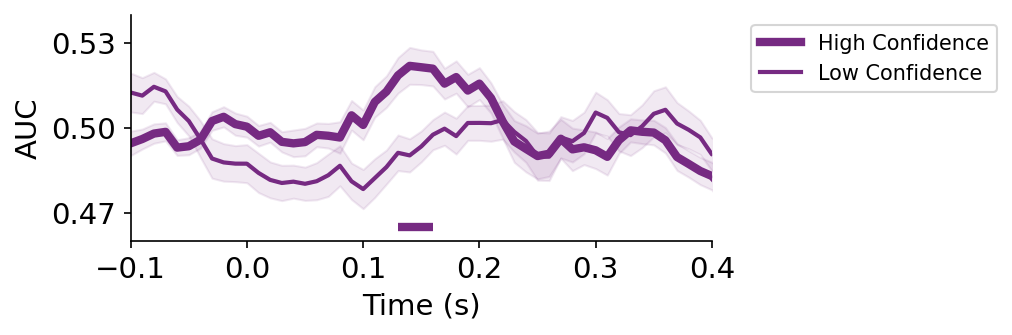

In [66]:

linew_high = 4
linew_low = 2
linew_normal = 3

font_size = 14
al = 0.1 # alpha transparency
times_sm = epoch.times[:-sm_n+1]

# initialize plots:
fig, ax2 = plt.subplots(nrows=1, sharex=True, figsize=(5,2), dpi=150)
chance_col = np.array([37,37,37])/256

ColorsList = np.array(([194,165,207], [118,42,131], [64,0,75]))/256

col = np.array([118,42,131])/256

#90% high
mean_ch9s = np.mean(ch9s, axis = 0)
ch9se = sem(ch9s, axis = 0)/2

ax2.plot(times_sm, mean_ch9s, color = ColorsList[1], linewidth = linew_high, label='High Confidence')
ax2.fill_between(times_sm, mean_ch9s, mean_ch9s + ch9se, color = col, interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_ch9s, mean_ch9s - ch9se, color = col, interpolate=True, alpha = al)

print('timepoints p9h: ', times_sm[np.where(p9h <= p_thres)[0]])
if len(np.where(p9h <= 0.05)[0]) > 0:
    ax2.hlines(y=0.465, xmin=times_sm[np.where(p9h <= p_thres)[0][0]], 
               xmax=times_sm[np.where(p9h <= 0.05)[0][-1]], color=ColorsList[1], linestyle='-', linewidth = linew_high)

#90% low
mean_cl9s = np.mean(cl9s, axis = 0)
cl9se = sem(cl9s, axis = 0)/2

ax2.plot(times_sm, mean_cl9s, color = ColorsList[1], linewidth = linew_low, label='Low Confidence')
ax2.fill_between(times_sm, mean_cl9s, mean_cl9s + cl9se, color = col, interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_cl9s, mean_cl9s - cl9se, color = col, interpolate=True, alpha = al)


ax2.set_xticks(np.arange(-0.1, 0.6, 0.1))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.ylim([0.46, 0.54])
plt.yticks([0.47,0.50,0.53], fontsize=font_size)
plt.xticks([-0.1,0,0.1,0.2,0.3,0.4,0.5], fontsize=font_size)
plt.xlim([-0.1, 0.4])
#plt.legend([label8,label9,label10], loc=5, bbox_to_anchor=(1.45, 0.7), handlelength=4)
plt.xlabel('Time (s)', fontsize=font_size)
plt.ylabel('AUC', fontsize=font_size)


# Chance
#ax2.hlines(y=0.5, xmin=times_sm[0], xmax=times_sm[-1], color=chance_col, linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plotname = figuresFolder + 'MVPA_HighLow_90' + smooths+'.png'
plt.savefig(plotname, bbox_inches='tight')
plt.show()




timepoints pchc:  [0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21]
timepoints pchi:  [0.24 0.25 0.26 0.27]


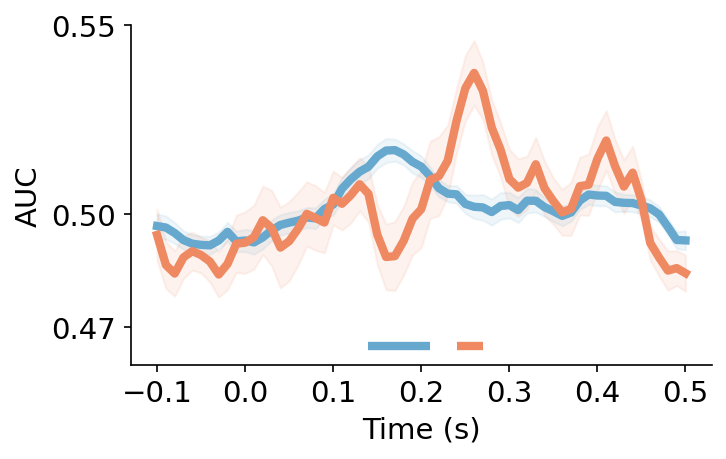

In [67]:
font_size = 14
al = 0.1 # alpha transparency
times_sm = epoch.times[:-sm_n+1]

# initialize plots:
fig, ax2 = plt.subplots(nrows=1, sharex=True, figsize=(5,3), dpi=150)
chance_col = np.array([37,37,37])/256

ColorsList = np.array(([239,138,98], [103,169,207]))/256

col = np.array([118,42,131])/256

#high + correct
mean_chcs = np.mean(chcs, axis = 0)
chcse = sem(chcs, axis = 0)/2

ax2.plot(times_sm, mean_chcs, color = ColorsList[1], linewidth = 4, label='Correct-predicted labels')
ax2.fill_between(times_sm, mean_chcs, mean_chcs + chcse, color = ColorsList[1], interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_chcs, mean_chcs - chcse, color = ColorsList[1], interpolate=True, alpha = al)

print('timepoints pchc: ', times_sm[np.where(pchc <= p_thres)[0]])
if len(np.where(pchc <= 0.05)[0]) > 0:
    ax2.hlines(y=0.465, xmin=times_sm[np.where(pchc <= p_thres)[0][0]], 
               xmax=times_sm[np.where(pchc <= 0.05)[0][-1]], color=ColorsList[1], linestyle='-', linewidth = 4)


#high + incorrect
mean_chis = 1-np.mean(chis, axis = 0)
chise = sem(chis, axis = 0)/2
ax2.plot(times_sm, mean_chis, color = ColorsList[0], linewidth = 4, label='Incorrect-predicted labels')
ax2.fill_between(times_sm, mean_chis, mean_chis + chise, color = ColorsList[0], interpolate=True, alpha = al)
ax2.fill_between(times_sm, mean_chis, mean_chis - chise, color = ColorsList[0], interpolate=True, alpha = al)

print('timepoints pchi: ', times_sm[np.where(pchi <= p_thres)[0]])
if len(np.where(pchi <= 0.05)[0]) > 0:
    ax2.hlines(y=0.465, xmin=times_sm[np.where(pchi <= p_thres)[0][0]], 
               xmax=times_sm[np.where(pchi <= 0.05)[0][-1]], color=ColorsList[0], linestyle='-', linewidth = 4)

ax2.set_xticks(np.arange(-0.1, 0.6, 0.1))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.ylim([0.46, 0.53])
plt.yticks([0.47,0.50,0.55], fontsize=font_size)
plt.xticks([-0.1,0,0.1,0.2,0.3,0.4,0.5], fontsize=font_size)

#plt.legend()
plt.xlabel('Time (s)', fontsize=font_size)
plt.ylabel('AUC', fontsize=font_size)

plotname = figuresFolder + 'MVPA_High_CorrIncorr' + smooths+'.png'
plt.savefig(plotname, bbox_inches='tight')
plt.show()

